#Data preprocessing - Vishal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#Read the data
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [104]:
#Dropping irrelavent columns
data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [106]:
#Dummy variable
sig_cat_col = ['Geography', 'Gender']

dummies = pd.get_dummies(data[sig_cat_col], drop_first = True)
dummies.shape

#Add the results to the original dataframe
data = pd.concat([data, dummies], axis = 1)

# Drop the original cat variables as dummies are already created
data.drop( sig_cat_col, axis = 1, inplace = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [198]:
#Removing outliers
from scipy import stats
z = np.abs(stats.zscore(data))
threshold = 3

#Removing outliers
data_without_outliers = data[(z < 3).all(axis=1)]

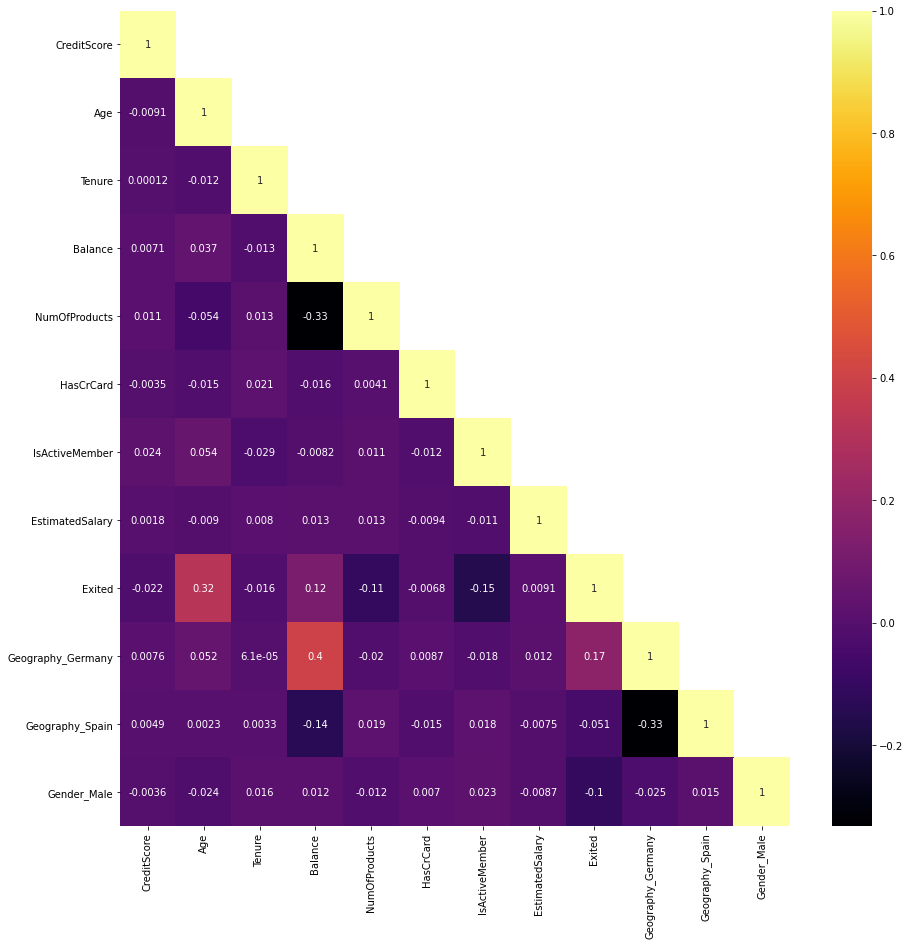

In [199]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data_without_outliers.corr(),annot=True,cmap='inferno',mask=np.triu(data_without_outliers.corr(),k=1))

In [200]:
#Dropping irrelavent columns
data_without_outliers.drop(["NumOfProducts", "IsActiveMember"], axis = 1, inplace = True)

In [201]:
#Getting X and Y
pd.options.mode.chained_assignment = None  # default='warn'

Y = data_without_outliers.iloc[:, 8].values
data_without_outliers.drop(['Exited'], axis = 1, inplace = True)
X = data_without_outliers.values


print(X.shape)
print(Y.shape)

(9799, 9)
(9799,)


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7839, 9) (7839,) (1960, 9) (1960,)


In [204]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [205]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train[:, [0,1,2,3,5]] = sc.fit_transform(X_train[:,[0,1,2,3,5]])
X_test[:, [0,1,2,3,5]] = sc.transform(X_test[:,[0,1,2,3,5]])

#Neural network - Vishal


Alright now lets build our neural network

In [59]:
def sigmoid(X):
  res = 1 / (1 + np.exp(-X))
  return res

In [85]:
def initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer):
  
  #Weights and biases between input layer and hidden layer 1 
  W1 = np.random.randn(hidden_layer_1, input_layer)
  b1 = np.zeros((hidden_layer_1, 1))

  #Weights and biases between hidden layer 1 and hidden layer 2 
  W2 = np.random.randn(hidden_layer_2, hidden_layer_1)
  b2 = np.zeros((hidden_layer_2, 1))
  
  #Weights and biases between hidden layer 1 and hidden layer 2 
  W3 = np.random.randn(hidden_layer_3, hidden_layer_2)
  b3 = np.zeros((hidden_layer_3, 1))

  #Weights and biases between hidden layer 3 and output layer 
  W4 = np.random.randn(output_layer, hidden_layer_3)
  b4 = np.zeros((output_layer, 1))

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [61]:
def Forward_prop(X, Weights):

  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Forward propagation - We will be using tanh as activation for hidden layer 
  #and sigmoid for output_layer
  Z1 = np.matmul(W1, X) + b1
  A1 = np.tanh(Z1)

  Z2 = np.matmul(W2, A1) + b2
  A2 = np.tanh(Z2)

  Z3 = np.matmul(W3, A2) + b3
  A3 = np.tanh(Z3)
  
  Z4 = np.matmul(W4, A3) + b4
  A4 = sigmoid(Z4) #Our Y_hat or predicted value

  Units = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2, "Z3" : Z3, "A3" : A3, "Z4" : Z4, "A4" : A4}
  return Units

In [62]:
def cost_compute(Units, y, m):

  #Extracting Y_hat from Units
  A4 = Units["A4"]

  #The cost function is the same as the one we used for logistic regression
  J = (np.sum((-y * np.log(A4)) - ((1 - y) * (np.log(1 - A4)))) / m)

  return J

In [63]:
def Back_prop(Weights, Units, X, Y):

  #Extracting Weights
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  #Extracting units
  A1 = Units["A1"]
  A2 = Units["A2"]
  A3 = Units["A3"]
  A4 = Units["A4"]

  #Back propagation
  dz4 = A4 - Y
  dw4 = (1/m) * np.matmul(dz4, A3.T)
  db4 = (1/m) * np.sum(dz4, axis = 1, keepdims = True)

  dz3 = np.multiply(np.matmul(W4.T, dz4), 1 - np.power(A3,2)) # derivative of tanh(Z) = 1-A^2
  dw3 = (1/m) * np.matmul(dz3, A2.T)
  db3 = (1/m) * np.sum(dz3, axis = 1, keepdims = True)
  
  dz2 = np.multiply(np.matmul(W3.T, dz3), 1 - np.power(A2,2))
  dw2 = (1/m) * np.matmul(dz2, A1.T)
  db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)

  dz1 = np.multiply(np.matmul(W2.T, dz2), 1 - np.power(A1,2))
  dw1 = (1/m) * np.matmul(dz1, X.T)
  db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

  Grads = {"dw1" : dw1, "db1" : db1, "dw2" : dw2, "db2" : db2, "dw3" : dw3, "db3" : db3, "dw4" : dw4, "db4" : db4}
  return Grads

In [64]:
def Update_Weights(Weights, Grads, alpha):
  
  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Extracting grads
  dw1 = Grads["dw1"]
  dw2 = Grads["dw2"]
  dw3 = Grads["dw3"]
  dw4 = Grads["dw4"]

  db1 = Grads["db1"]
  db2 = Grads["db2"]
  db3 = Grads["db3"]
  db4 = Grads["db4"]

  #Updating weights and biases
  W1 = W1 - alpha * dw1
  W2 = W2 - alpha * dw2
  W3 = W3 - alpha * dw3
  W4 = W4 - alpha * dw4

  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  b3 = b3 - alpha * db3
  b4 = b4 - alpha * db4

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [206]:
#Inversion
X_train = X_train.reshape(X_train.shape[0], -1).T
y_train = y_train.reshape(len(y_train), 1).T
X_test = X_test.reshape(X_test.shape[0], -1).T
y_test = y_test.reshape(len(y_test), 1).T

print("X-train :", X_train.shape, "Y-train: ",y_train.shape)
print("X-test :", X_test.shape, "Y-test: ",y_test.shape)

X-train : (9, 8829) Y-train:  (1, 8829)
X-test : (9, 1960) Y-test:  (1, 1960)


Cost after Iter : 0 Cost : -22.744954508312535
Cost after Iter : 800 Cost : -5.130059955304464


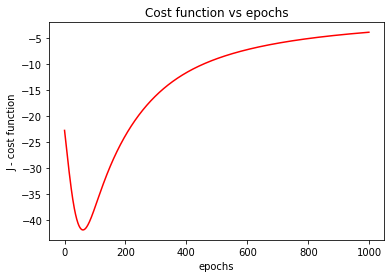

In [225]:
# ANN implementation
input_layer = X_train.shape[0]
hidden_layer_1 = 12
hidden_layer_2 = 10
hidden_layer_3 = 10
output_layer = y_train.shape[0]

epochs = 1000
m = X_train.shape[1]
alpha = 0.01

#Dictionary containing the weights of the different layers
Weights = initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer)

#Storing cost history for plotting purposes
J_hist = []

#Gradient descent
for i in range(epochs):
  Units = Forward_prop(X_train, Weights)

  J = cost_compute(Units, y_train, m)
  J_hist.append(J)

  Grads = Back_prop(Weights, Units, X_train, y_train)  

  Weights = Update_Weights(Weights, Grads, alpha)
  if i % 800 == 0:
    print("Cost after Iter :", i, "Cost :", J)

#Plotting cost vs epochs
plt.plot(range(epochs), J_hist, color = 'red')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

In [226]:
#Train set
#Calling forward propagation and getting y_pred
finalUnits = Forward_prop(X_train, Weights)
y_pred = finalUnits["A4"]
y_pred = y_pred.T

Y_pred = list()
for x in y_pred:
  if x >= 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)  

Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape(1, Y_pred.shape[0])

#Accuracy
score = np.sum(y_train == Y_pred) / y_train.shape[1] * 100

print("Accuracy :", score)

Accuracy : 99.9660210669385


In [229]:
#Test set
#Calling forward propagation and getting y_pred
finalUnits = Forward_prop(X_test, Weights)
y_pred = finalUnits["A4"]
y_pred = y_pred.T

Y_pred = list()
for x in y_pred:
  if x >= 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)  

Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape(1, Y_pred.shape[0])

#Accuracy
score = np.sum(y_test == Y_pred) / y_test.shape[1] * 100

print("Accuracy :", score)

Accuracy : 99.84693877551021


In [230]:
from sklearn.metrics import classification_report,confusion_matrix
y_test = y_test.T
Y_pred = Y_pred.T
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1474
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

[[1472    2]
 [   1  485]]


# NEURAL NETWORK USING SKLEARN

In [233]:
Y_train = np.reshape(y_train,(y_train.shape[1],))
Y_train.shape

(8829,)

In [235]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train.T,Y_train)

predict_train = mlp.predict(X_train.T)
predict_test = mlp.predict(X_test.T)

In [236]:

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

[[5886    0]
 [   0 2943]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5886
           1       1.00      1.00      1.00      2943

    accuracy                           1.00      8829
   macro avg       1.00      1.00      1.00      8829
weighted avg       1.00      1.00      1.00      8829

